# 1. Cities in Sweden - Create Dataset

In [2]:
import pandas as pd

data = dict(Kommun = ["Malmö", "Stockholm", "Uppsala", "Göteborg"], Population = [347949, 975551, 233839, 583056])
cities = pd.DataFrame(data, columns=("Kommun", "Population"))
cities

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [3]:
#by name
cities[cities.Kommun == "Göteborg"]

,Kommun,Population
3,Göteborg,583056


In [4]:
#by row index
cities.iloc[3]

Kommun        Göteborg
Population      583056
Name: 3, dtype: object

In [5]:
cities.sort_values(by = "Population", ascending = False)

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


In [6]:
Three_largest_cities = cities.sort_values(by = "Population", ascending = False).head(3)
Three_largest_cities

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


In [7]:
cities["Population (%)"] = cities ["Population"]/10379295*100
cities

,Kommun,Population,Population (%)
0,Malmö,347949,3.352338
1,Stockholm,975551,9.399010
2,Uppsala,233839,2.252937
3,Göteborg,583056,5.617491


# 2. Cities in Sweden - Real Dataset

In [8]:
real_data = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name=1)
real_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Folkmängd per kommun 31 december 2020 jämfört ...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring
...,...,...,...,...,...,...
291,54,55.0,Österåker,46644,45574.0,2.34783
292,116,115.0,Östhammar,22251,22250.0,0.004494
293,160,159.0,Östra Göinge,15017,15007.0,0.066636
294,284,284.0,Överkalix,3289,3315.0,-0.784314


In [9]:

real_data.info()
real_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    object 
 1   Unnamed: 1  291 non-null    float64
 2   Unnamed: 2  291 non-null    object 
 3   Unnamed: 3  292 non-null    object 
 4   Unnamed: 4  291 non-null    float64
 5   Unnamed: 5  292 non-null    object 
dtypes: float64(2), object(4)
memory usage: 14.0+ KB


,Unnamed: 1,Unnamed: 4
count,291.000000,291.000000
mean,151.934708,35496.934708
std,138.092769,74190.464321
min,1.000000,2019.000000
25%,73.500000,10005.000000
50%,146.000000,15940.000000
75%,218.500000,35649.500000
max,2019.000000,974073.000000


In [10]:

real_data = real_data.rename({"Unnamed: 0":"Rang 2020", "Unnamed: 1":"Rang 2019", "Unnamed: 2":"Kommun", "Unnamed: 3":"Folkmängd 2020", "Unnamed: 4":"Folkmängd 2019", "Unnamed: 5":"Förändring"}, axis="columns")
real_data = real_data.iloc[6:]
real_data = real_data.reset_index(drop=True)
real_data

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84.0,Ale,31868,31402.0,1.483982
1,64,64.0,Alingsås,41602,41420.0,0.439401
2,123,123.0,Alvesta,20224,20134.0,0.447005
3,255,255.0,Aneby,6821,6848.0,-0.394276
4,169,167.0,Arboga,14039,14087.0,-0.34074
...,...,...,...,...,...,...
285,54,55.0,Österåker,46644,45574.0,2.34783
286,116,115.0,Östhammar,22251,22250.0,0.004494
287,160,159.0,Östra Göinge,15017,15007.0,0.066636
288,284,284.0,Överkalix,3289,3315.0,-0.784314


In [11]:
real_data.sort_values(by="Folkmängd 2020", ascending=False)

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1.0,Stockholm,975551,974073.0,0.151734
57,2,2.0,Göteborg,583056,579281.0,0.65167
134,3,3.0,Malmö,347949,344166.0,1.099179
241,4,4.0,Uppsala,233839,230767.0,1.331213
124,5,5.0,Linköping,164616,163051.0,0.959822
...,...,...,...,...,...,...
271,286,286.0,Åsele,2805,2794.0,0.393701
5,287,287.0,Arjeplog,2718,2785.0,-2.405745
29,288,288.0,Dorotea,2498,2551.0,-2.077617
194,289,289.0,Sorsele,2442,2489.0,-1.888309


In [12]:
five_largest = real_data.sort_values(by="Folkmängd 2020", ascending=False).head(5)
five_largest

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1.0,Stockholm,975551,974073.0,0.151734
57,2,2.0,Göteborg,583056,579281.0,0.65167
134,3,3.0,Malmö,347949,344166.0,1.099179
241,4,4.0,Uppsala,233839,230767.0,1.331213
124,5,5.0,Linköping,164616,163051.0,0.959822


In [13]:
five_smallest = real_data.sort_values(by="Folkmängd 2020").head()
five_smallest

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
12,290,290.0,Bjurholm,2387,2408.0,-0.872093
194,289,289.0,Sorsele,2442,2489.0,-1.888309
29,288,288.0,Dorotea,2498,2551.0,-2.077617
5,287,287.0,Arjeplog,2718,2785.0,-2.405745
271,286,286.0,Åsele,2805,2794.0,0.393701


In [14]:

print(f"The population in Sweden 2019 : {sum(real_data['Folkmängd 2019'])}")
print(f"The population in Sweden 2020 : {sum(real_data['Folkmängd 2020'])}")

The population in Sweden 2019 : 10327589.0
The population in Sweden 2020 : 10379295


<AxesSubplot:xlabel='Kommun', ylabel='Folkmängd 2020'>

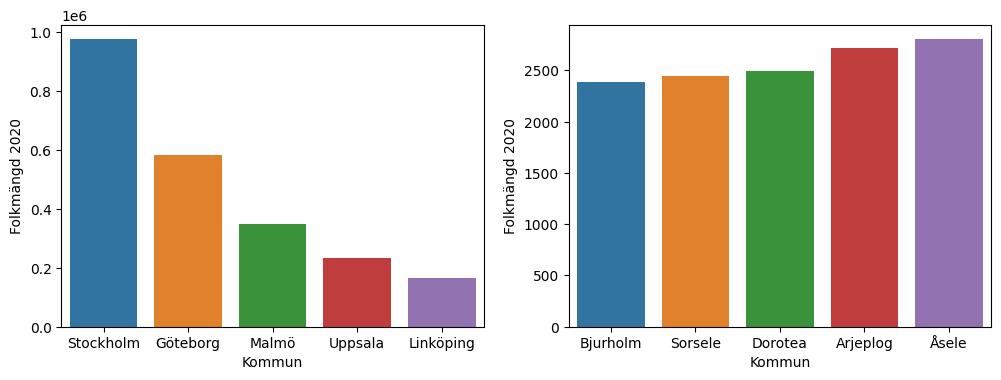

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, dpi=100, figsize=(12, 4))
sns.barplot(data=five_largest, x="Kommun", y="Folkmängd 2020", ax=ax[0])
sns.barplot(data=five_smallest, x="Kommun", y="Folkmängd 2020", ax=ax[1])

# 3) Cities in Sweden - Gender

In [16]:
data_female = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name=2)
data_female


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Antal kvinnor per kommun 31 december 2020 jämf...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Kvinnor 31 december,NaN,Förändring
...,...,...,...,...,...,...
291,55,57.0,Österåker,22997,22442.0,2.473042
292,117,118.0,Östhammar,10846,10803.0,0.398038
293,160,159.0,Östra Göinge,7270,7262.0,0.110162
294,284,284.0,Överkalix,1559,1578.0,-1.204056


In [17]:
data_female = data_female.rename({"Unnamed: 0":"Rang 2020", "Unnamed: 1":"Rang 2019", "Unnamed: 2":"Kommun", "Unnamed: 3":"Folkmängd 2020", "Unnamed: 4":"Folkmängd 2019", "Unnamed: 5":"Förändring"}, axis="columns")
data_female = data_female.iloc[6:]
data_female = data_female.reset_index(drop=True)
data_female

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,84,85.0,Ale,15612,15348.0,1.720094
1,64,64.0,Alingsås,20900,20774.0,0.606527
2,123,123.0,Alvesta,9857,9795.0,0.632976
3,255,255.0,Aneby,3318,3350.0,-0.955224
4,165,164.0,Arboga,6945,6973.0,-0.401549
...,...,...,...,...,...,...
285,55,57.0,Österåker,22997,22442.0,2.473042
286,117,118.0,Östhammar,10846,10803.0,0.398038
287,160,159.0,Östra Göinge,7270,7262.0,0.110162
288,284,284.0,Överkalix,1559,1578.0,-1.204056


In [18]:
data_male = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name=3)
data_male

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Antal män per kommun 31 december 2020 jämfört ...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Män 31 december,NaN,Förändring
...,...,...,...,...,...,...
291,52,55.0,Österåker,23647,23132.0,2.226353
292,115,115.0,Östhammar,11405,11447.0,-0.366908
293,158,156.0,Östra Göinge,7747,7745.0,0.025823
294,284,284.0,Överkalix,1730,1737.0,-0.402994


In [19]:
data_male = data_male.rename({"Unnamed: 0":"Rang 2020", "Unnamed: 1":"Rang 2019", "Unnamed: 2":"Kommun", "Unnamed: 3":"Folkmängd 2020", "Unnamed: 4":"Folkmängd 2019", "Unnamed: 5":"Förändring"}, axis="columns")
data_male = data_male.iloc[6:]
data_male = data_male.reset_index(drop=True)
data_male

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,81,83.0,Ale,16256,16054.0,1.258253
1,64,64.0,Alingsås,20702,20646.0,0.271239
2,122,123.0,Alvesta,10367,10339.0,0.270819
3,255,255.0,Aneby,3503,3498.0,0.142939
4,169,168.0,Arboga,7094,7114.0,-0.281136
...,...,...,...,...,...,...
285,52,55.0,Österåker,23647,23132.0,2.226353
286,115,115.0,Östhammar,11405,11447.0,-0.366908
287,158,156.0,Östra Göinge,7747,7745.0,0.025823
288,284,284.0,Överkalix,1730,1737.0,-0.402994


In [25]:
#Creates Kön column and adds the gender to it
data_male["Kön"] = "Man"
data_male


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,81,83.0,Ale,16256,16054.0,1.258253,Man
1,64,64.0,Alingsås,20702,20646.0,0.271239,Man
2,122,123.0,Alvesta,10367,10339.0,0.270819,Man
3,255,255.0,Aneby,3503,3498.0,0.142939,Man
4,169,168.0,Arboga,7094,7114.0,-0.281136,Man
...,...,...,...,...,...,...,...
285,52,55.0,Österåker,23647,23132.0,2.226353,Man
286,115,115.0,Östhammar,11405,11447.0,-0.366908,Man
287,158,156.0,Östra Göinge,7747,7745.0,0.025823,Man
288,284,284.0,Överkalix,1730,1737.0,-0.402994,Man


In [26]:
data_female["Kön"] = "Kvinna"
data_female

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,84,85.0,Ale,15612,15348.0,1.720094,Kvinna
1,64,64.0,Alingsås,20900,20774.0,0.606527,Kvinna
2,123,123.0,Alvesta,9857,9795.0,0.632976,Kvinna
3,255,255.0,Aneby,3318,3350.0,-0.955224,Kvinna
4,165,164.0,Arboga,6945,6973.0,-0.401549,Kvinna
...,...,...,...,...,...,...,...
285,55,57.0,Österåker,22997,22442.0,2.473042,Kvinna
286,117,118.0,Östhammar,10846,10803.0,0.398038,Kvinna
287,160,159.0,Östra Göinge,7270,7262.0,0.110162,Kvinna
288,284,284.0,Överkalix,1559,1578.0,-1.204056,Kvinna


In [30]:
#Merge the data
total_data = data_male.append(data_female)
total_data

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,81,83.0,Ale,16256,16054.0,1.258253,Man
1,64,64.0,Alingsås,20702,20646.0,0.271239,Man
2,122,123.0,Alvesta,10367,10339.0,0.270819,Man
3,255,255.0,Aneby,3503,3498.0,0.142939,Man
4,169,168.0,Arboga,7094,7114.0,-0.281136,Man
...,...,...,...,...,...,...,...
285,55,57.0,Österåker,22997,22442.0,2.473042,Kvinna
286,117,118.0,Östhammar,10846,10803.0,0.398038,Kvinna
287,160,159.0,Östra Göinge,7270,7262.0,0.110162,Kvinna
288,284,284.0,Överkalix,1559,1578.0,-1.204056,Kvinna


In [28]:
real_data.head()
real_data = real_data.rename({"Folkmängd 2020": "Total Pop 2020", "Folkmängd 2019": "Total Pop 2019", "Förändring": "Total förändring"}, axis="columns")
real_data = real_data.drop(["Rang 2020", "Rang 2019"], axis=1)
real_data.head()

,Kommun,Total Pop 2020,Total Pop 2019,Total förändring
0,Ale,31868,31402.0,1.483982
1,Alingsås,41602,41420.0,0.439401
2,Alvesta,20224,20134.0,0.447005
3,Aneby,6821,6848.0,-0.394276
4,Arboga,14039,14087.0,-0.34074


In [33]:
data_merged = pd.merge(real_data, total_data) # merge the previous data with the real data
data_merged = data_merged[["Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring", "Kön", "Total Pop 2020", "Total Pop 2019", "Total förändring"]]
data_merged.sort_values('Total Pop 2020', ascending=False).head()

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
396,Stockholm,482982,482220.0,0.158019,Man,975551,974073.0,0.151734
397,Stockholm,492569,491853.0,0.145572,Kvinna,975551,974073.0,0.151734
115,Göteborg,290551,288973.0,0.546072,Kvinna,583056,579281.0,0.65167
114,Göteborg,292505,290308.0,0.756782,Man,583056,579281.0,0.65167
269,Malmö,175411,173543.0,1.07639,Kvinna,347949,344166.0,1.099179


Text(0.5, 1.0, 'smallest_10')

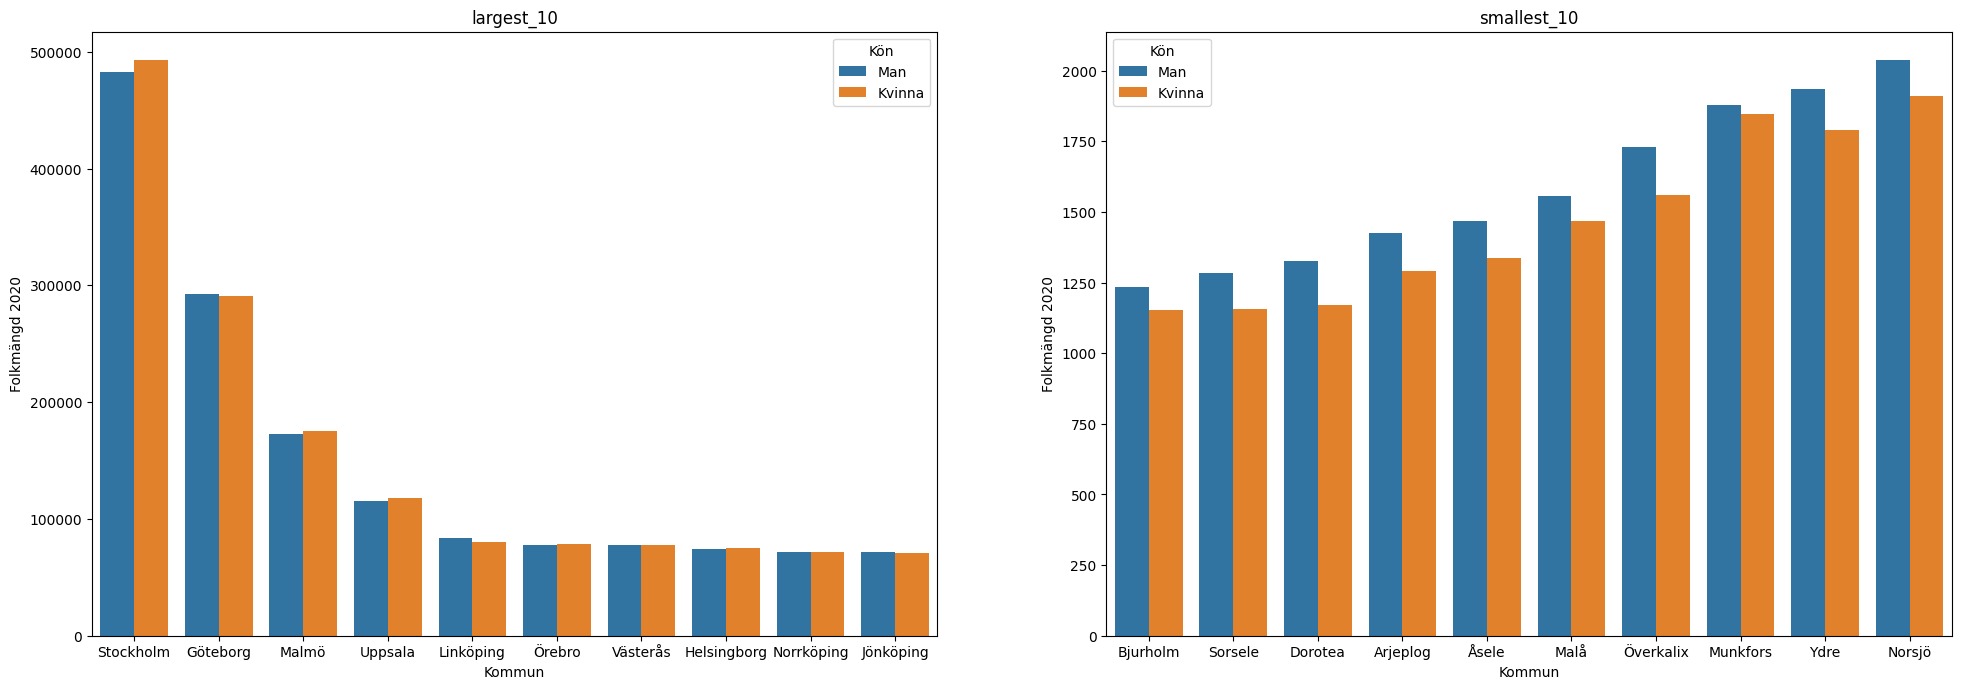

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

smallest_10 = data_merged.sort_values(by = "Total Pop 2020", ascending=True).head(20)
largest_10 = data_merged.sort_values(by = "Total Pop 2020", ascending=False).head(20)

fig, ax = plt.subplots(1,2, dpi=100, figsize=(24,8))

sns.barplot(data=largest_10, x="Kommun", y="Folkmängd 2020", ax = ax[0], hue="Kön").set_title("largest_10")
sns.barplot(data=smallest_10, x="Kommun", y="Folkmängd 2020", ax = ax[1], hue="Kön").set_title("smallest_10")

Text(0.5, 1.0, 'smallest_10')

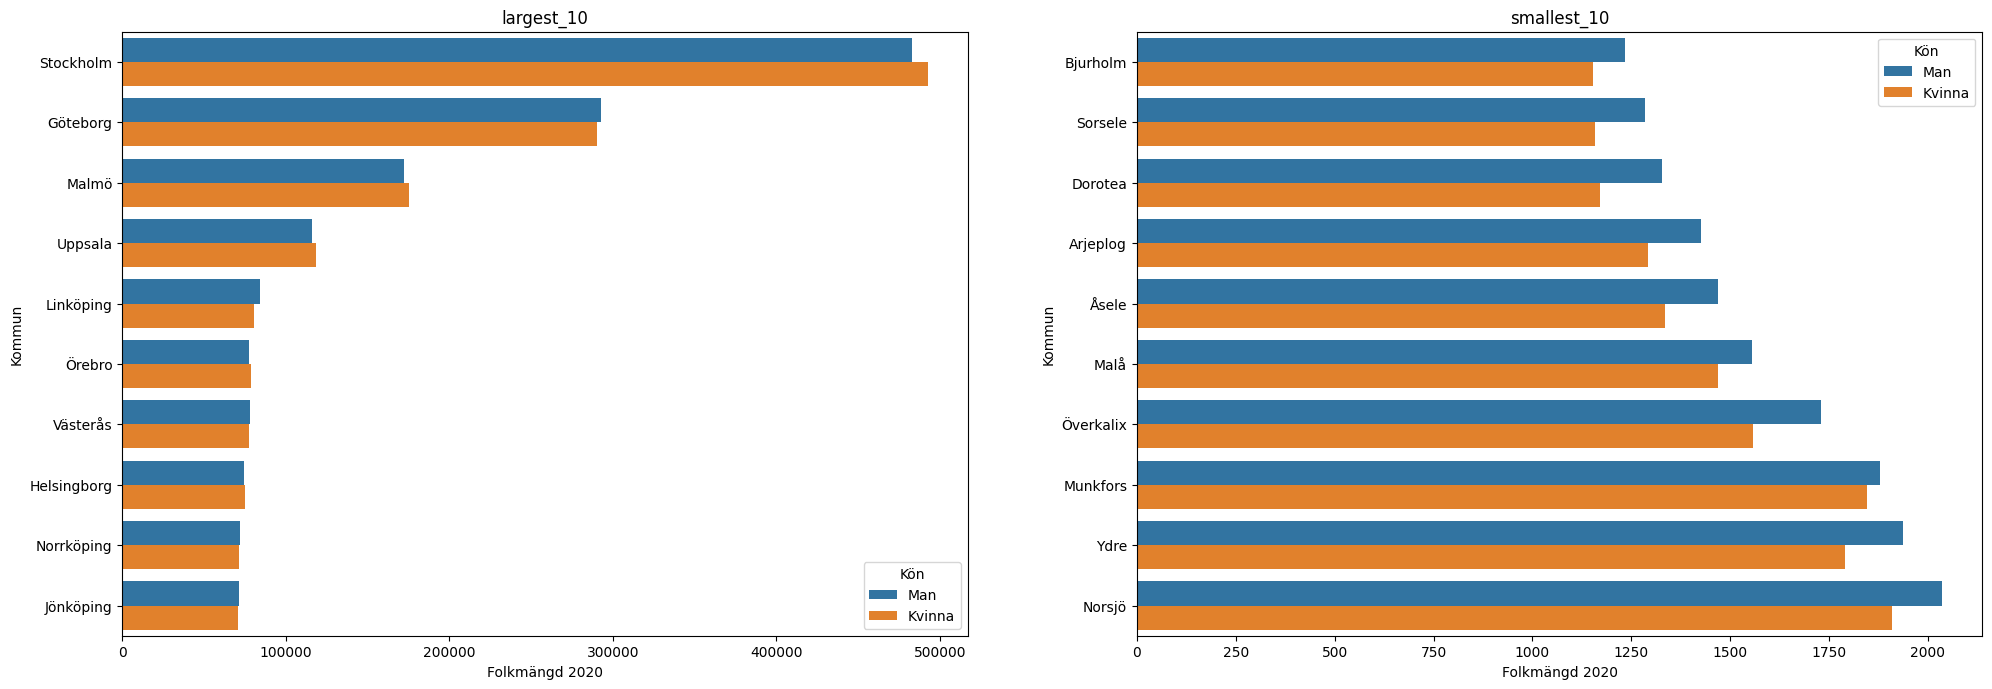

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

smallest_10 = data_merged.sort_values(by = "Total Pop 2020", ascending=True).head(20)
largest_10 = data_merged.sort_values(by = "Total Pop 2020", ascending=False).head(20)

fig, ax = plt.subplots(1,2, dpi=100, figsize=(24,8))

sns.barplot(data=largest_10, x="Folkmängd 2020", y="Kommun", ax = ax[0], hue="Kön").set_title("largest_10")
sns.barplot(data=smallest_10, x="Folkmängd 2020", y="Kommun", ax = ax[1], hue="Kön").set_title("smallest_10")

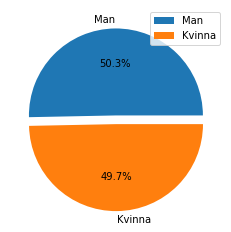

In [40]:
#create data
data = [data_male["Folkmängd 2020"].sum(), data_female["Folkmängd 2020"].sum()]
labels = ["Man", "Kvinna"]

#create pie chart
plt.pie(data, labels = labels, autopct='%1.1f%%', explode=(0,0.1))
plt.legend()
plt.show()